In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Pengantar Machine Learning

Apa artinya learning? Learning adalah proses di mana kita melakukan serangkaian pengamatan dan menarik kesimpulan berdasarkan pengalaman masa lalu. Misalnya, kita dapat melakukan "learning" / belajar mengenali pola dalam data pengalaman atau experiential. Machine Learning adalah ketika kita mengajarkan komputer untuk melakukan hal yang sama, yaitu menemukan pola dalam data. Idenya adalah bahwa manusia sangat hebat dalam menemukan pola, tetapi relatif lambat dalam melihat data dalam jumlah besar. Komputer perlu dilatih untuk menemukan polanya, tetapi mereka dapat memproses data seperti yang kita miliki (file csv, gambar, dll) dengan sangat cepat.

Revolusi Machine Learning berakar pada dua faktor utama

1. Sejumlah besar data yang baru dibuat
2. Peningkatan besar dalam memori dan kinerja komputer

Jika kita ingin memanfaatkan machine learning, kita perlu belajar mengajar komputer untuk mengenali pola dan memanfaatkan kemampuan itu untuk memecahkan pola atau pattern di dunia nyata. Mari kita mulai dengan contoh yang sangat sederhana.

Katakanlah kita memiliki data satu dimensi yang diberikan oleh satu feature $X$ dan satu set label yang bersesuaian $y$. Kita ingin memodelkan data ini, jadi kita akan membuat hubungan $f(X) \approx y$. Fungsi $f$ ini akan mewakili model kita. Kita akan generate data di sini dengan memilih eksponen untuk sebuah tren secara acak dan menambahkan beberapa noise acak. Mari kita buat datanya dan lihat seperti apa jadinya.

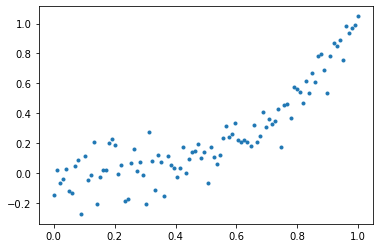

In [2]:
X = np.linspace(0, 1, 100)
exp = np.random.choice([2, 3])
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, y, '.');

Kita sekarang akan menghasilkan hubungan prediktif dengan menggunakan salah satu metode paling sederhana, fitting garis ke data

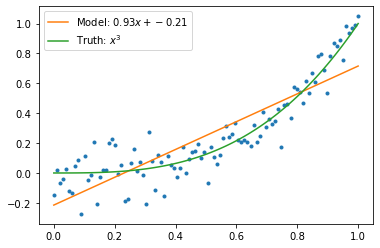

In [3]:
p = np.polyfit(X, y, 1)
z = np.poly1d(p)
plt.plot(X, y, '.')
plt.plot(X, z(X), label=r"Model: ${:.2f}x + {:.2f}$".format(*p))
plt.plot(X, X**exp, label=r'Truth: $x^{}$'.format(exp))
plt.legend();

Kita sekarang memiliki model untuk data ini, dipelajari oleh komputer, yaitu diberi nilai (atau sekelompok nilai) $X$ , kita dapat memprediksi output. Dalam konteks Machine Learning, ini disebut Regresi Linier dan merupakan metode yang cukup powerful dan umum untuk dipelajari. Contoh ini saja membuka banyak pertanyaan yang akan kita jawab di kuliah selanjutnya:

1. Seberapa bagus model tersebut?
2. Bisakah kita menambahkan fleksibilitas pada model?
3. Apakah model dapat digeneralisasikan?
4. Apa yang diajarkan model ini pada kita tentang data?

Mari kita mulai dengan pertanyaan 4, yang dalam banyak hal merupakan pertanyaan yang paling penting. Untuk model sederhana ini kita dapat melihat bahwa vektor label $y$ memiliki korelasi positif dengan feature $X$.

Biasanya tujuan machine learning adalah dua sekaligus

1. Untuk memahami data yang sudah kita miliki
2. Gunakan pemahaman ini untuk membuat prediksi tentang data yang tidak berlabel

Machine Learning terbagi dalam dua kelas, **supervised** dan **unsupervised** learning. Dalam supervised learning, kita mencoba mempelajari hubungan prediktif antara **feature** dari data kita dan semacam label output. Dalam unsupervised learning, kita ingin menemukan tren dalam feature kita tanpa menggunakan label target apa pun. Unsupervised learning biasanya bergantung pada pengurangan dimensi data.

Contoh supervised learning oleh manusia adalah meminjam buku dari perpustakaan tentang matematika dan geografi. Dengan membaca buku-buku berbeda yang termasuk dalam setiap topik, kita mempelajari simbol, gambar, dan kata apa yang diasosiasikan dengan matematika, dan mana yang diasosiasikan dengan geografi. Tugas unsupervised serupa adalah meminjam banyak buku tanpa mengetahui subjeknya. Kita dapat melihat beberapa buku berisi gambar yang mirip (peta) dan beberapa buku berisi simbol yang mirip (misalnya huruf Yunani $\Sigma$ dan $\pi$). Kita mengatakan buku-buku yang berisi peta serupa dan itu semua berbeda dari buku-buku yang berisi huruf Yunani. Yang terpenting, _kita tidak tahu tentang apa buku-buku itu, hanya saja mereka mirip atau berbeda_.

Secara formal, supervised machine problem dapat dinyatakan sebagai matriks $X$, berdimensi $n \times p$, membuat hubungan prediktif (atau fungsi) $f(X)$ di mana $f(X) \approx y$ , di mana $y$ adalah vektor berdimensi $n$. $X$ disebut sebagai **feature matrix** dan $y$ sebagai **label**.

Tujuan umum dari supervised learning adalah untuk kemudian menerapkan model ini ke data yang tidak berlabel. Hal ini memungkinkan kita untuk membuat prediksi!

Tentu saja, machine learning hanyalah sebuah alat, yang harus diterapkan dengan hati-hati dan banyak pertimbangan. Ini bukan solusi ideal untuk setiap masalah. Mari kita lihat beberapa masalah yang mungkin kita temukan.

## Kesulitan dalam Machine Learning

Model bisa sangat bias dan dengan demikian tidak cukup fleksibel untuk menangani generalisasi. Mari kita plot fungsi asli kita pada rentang yang lebih besar dan menggunakan model sebelumnya.

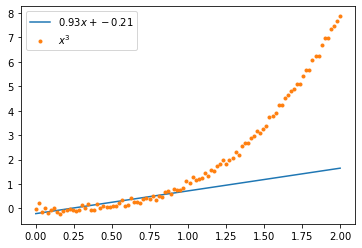

In [4]:
X = np.linspace(0, 2, 100)
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, z(X), label=r"${:.2f}x + {:.2f}$".format(*p))
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend();

Model bekerja dengan cukup baik untuk rentang data yang awal, tetapi kita dapat melihatnya tidak akan digeneralisasi dengan baik untuk features di luar rentang tersebut. Ini adalah masalah umum; kita harus berhati-hati dan memastikan bahwa data training kita berisi distribusi sampel yang baik di mana kita berharap untuk membuat prediksi. Machine learning menemukan pola dalam data yang telah dilihatnya, dan tidak selalu dapat membuat prediksi yang baik pada data yang belum pernah dilihatnya.

Mari kita coba untuk memperbaikinya dengan menambahkan lebih banyak parameter ke model.

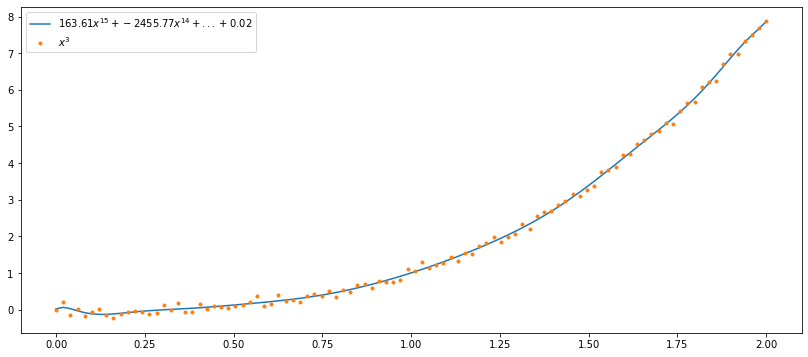

In [5]:
p = np.polyfit(X, y, 15)
z = np.poly1d(p)
plt.figure(figsize=[14, 6])
plt.plot(X, z(X), label=r"${:.2f}x^{{15}} + {:.2f}x^{{14}} + ... + {:.2f}$".format(*p[[0, 1, -1]]))
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend();

Terlihat fitting data sangat baik! Mungkin terlalu bagus? Sepertinya modelnya cocok dengan sedikit "noise" dalam data yang kita tahu tidak nyata (data sebenarnya berasal dari eksponen sederhana). Mari kita coba menggeneralisasi lagi.

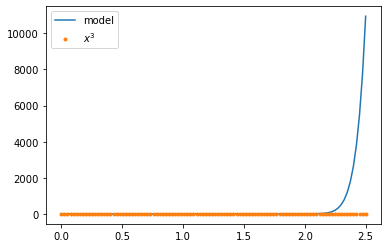

In [6]:
X = np.linspace(0, 2.5, 100)
y = X**exp + np.random.randn(X.shape[0])/10
plt.plot(X, z(X), label=r"model")
plt.plot(X, y,'.', label=r'$x^{}$'.format(exp))
plt.legend();

Ini adalah contoh overfitting, di mana kita membiarkan model terlalu fleksibel dan telah fitting dengan noise dalam data yang tidak dapat digeneralisasikan.

Kita akan mempelajari lebih lanjut bagaimana mengatasi masalah ini, tetapi intinya adalah kita harus berhati-hati saat memilih model yang ingin kita gunakan dan **hyperparameters** (dalam hal ini, order polinomial) untuk model tersebut.

## Scikit-Learn

Untuk melakukan machine learning, kita akan menggunakan package `scikit-learn` yang akan menawarkan antarmuka berbasis unified class untuk berbagai model dan utilitas machine learning. `Scikit-learn` didasarkan pada gagasan kelas `Estimator` yang mengimplementasikan metode yang diperlukan untuk machine learning.

Setiap objek estimator akan mengimplementasikan metode `fit` yang menerima argumen feature matrix `X` dan vektor label `y` serta metode `predict` yang menerima argumen feature matrix `X`. Mari kita pahami melalui sebuah contoh.

Pertama kita perlu mengimpor estimator yang kita inginkan, dalam hal ini `LinearRegression`.

In [7]:
from sklearn.linear_model import LinearRegression

Sekarang kita dapat membuat instance kelas ini dan memasukkan nilai hyperparameter apa pun ke dalam pembuatannya. [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) memiliki dua hyperparameter utama, `fit_intercept` dan `normalize`. Ini memiliki nilai default, tetapi kita akan menentukannya di sini secara eksplisit.

In [8]:
lr = LinearRegression(fit_intercept=True, normalize=False)
lr

LinearRegression(normalize=False)

Sekarang kita dapat menggunakan objek ini untuk fitting data kita. Kita akan menggunakan metode `fit` untuk melakukan ini. Kita perlu membentuk kembali vektor `X` sehingga menjadi feature matrix dari satu kolom, bukan vektor satu dimensi.

In [9]:
lr.fit(X.reshape(-1, 1), y)

C:\Users\dnfawwaz\Anaconda3\envs\practice\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [10]:
X

array([0.        , 0.02525253, 0.05050505, 0.07575758, 0.1010101 ,
       0.12626263, 0.15151515, 0.17676768, 0.2020202 , 0.22727273,
       0.25252525, 0.27777778, 0.3030303 , 0.32828283, 0.35353535,
       0.37878788, 0.4040404 , 0.42929293, 0.45454545, 0.47979798,
       0.50505051, 0.53030303, 0.55555556, 0.58080808, 0.60606061,
       0.63131313, 0.65656566, 0.68181818, 0.70707071, 0.73232323,
       0.75757576, 0.78282828, 0.80808081, 0.83333333, 0.85858586,
       0.88383838, 0.90909091, 0.93434343, 0.95959596, 0.98484848,
       1.01010101, 1.03535354, 1.06060606, 1.08585859, 1.11111111,
       1.13636364, 1.16161616, 1.18686869, 1.21212121, 1.23737374,
       1.26262626, 1.28787879, 1.31313131, 1.33838384, 1.36363636,
       1.38888889, 1.41414141, 1.43939394, 1.46464646, 1.48989899,
       1.51515152, 1.54040404, 1.56565657, 1.59090909, 1.61616162,
       1.64141414, 1.66666667, 1.69191919, 1.71717172, 1.74242424,
       1.76767677, 1.79292929, 1.81818182, 1.84343434, 1.86868

Metode `fit` akan melakukan fitting dan menyimpan parameter yang dipasang secara internal ke objek. Kita bisa melihat mereka jika kita mau.

In [11]:
lr.coef_, lr.intercept_

(array([5.63821971]), -3.102483065629364)

Menyimpan parameter di dalam instance sangat berguna karena memungkinkan kita untuk mengambil seluruh objek dan menyimpan parameter di dalam model itu sendiri.

Terakhir kita dapat menggunakan metode `predict` untuk membuat prediksi.

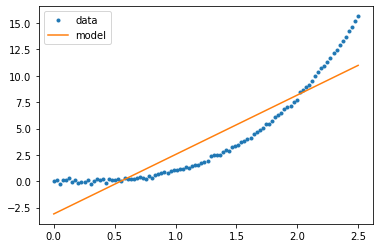

In [12]:
predictions = lr.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='data')
plt.plot(X, predictions, label='model')
plt.legend();

Kita akan mengeksplorasi model linier secara lebih rinci nanti, tetapi jika kita ingin membuat model ini lebih baik, kita perlu merekayasa beberapa fitur yang lebih baik.

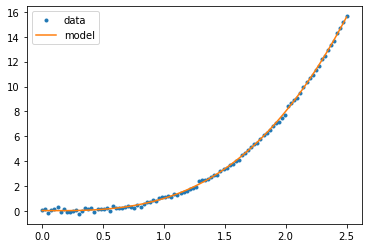

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('polynomial_transform', PolynomialFeatures(3)),
    ('linear_fit', LinearRegression())
])

pipe.fit(X.reshape(-1, 1), y)

predictions = pipe.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='data')
plt.plot(X, predictions, label='model')
plt.legend();

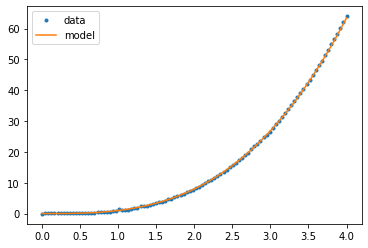

In [14]:
X = np.linspace(0, 4, 100)
y = X**exp + np.random.randn(X.shape[0])/10
predictions = pipe.predict(X.reshape(-1, 1))
plt.plot(X, y, '.', label='data')
plt.plot(X, predictions, label='model')
plt.legend();

In [15]:
import pandas as pd

# Scikit-learn

`Scikit-learn` adalah package Python paling populer untuk machine learning. Package ini memiliki banyak model machine learning dan menyediakan fungsi yang sering dibutuhkan untuk alur kerja machine learning. Anda akan lihat nanti bahwa antarmukanya cukup intuitif. Ini membuat pembuatan alur kerja machine learning yang sebenarnya rumit menjadi sangat mudah. Untuk notebook ini, kita akan menggunakan data perumahan California. Kumpulan data berisi nilai rumah median untuk setiap kelompok blok sensus di California.

In [16]:
from sklearn.datasets import fetch_california_housing

# get data
data = fetch_california_housing()
X = data['data']
y = data['target']

print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Model machine learning sebagai kelas

`Scikit-learn` sangat bergantung pada prinsip-prinsip pemrograman berorientasi objek (object-oriented programming / OOP). Scikit-learn mengimplementasikan algoritma machine learning sebagai kelas dan pengguna membuat objek dari sini. Misalnya, `Ridge` adalah kelas yang mewakili model regresi ridge. Untuk membuat objek `Ridge`, kita cukup membuat instance kelas. Dalam Python, konvensinya adalah bahwa nama kelas menggunakan CamelCase, huruf pertama setiap kata dikapitalisasi. `Scikit-learn` mengadopsi konvensi tersebut, membuatnya mudah untuk membedakan apa itu kelas.

In [17]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)

Dalam kode di atas, kita mengatur `alpha=0.1`. Di sini, `alpha` adalah **hyperparameter** dari model ridge. Hyperparameter adalah parameter model yang mengatur proses learning. Dalam hal hierarki, hyperparameters ini berada "di atas" parameter model reguler. Hyperparameters mengontrol nilai parameter model sama setelah menjalani training. Mereka dapat dengan mudah diidentifikasi karena merupakan parameter yang ditetapkan _sebelum_ learning. Dalam `scikit-learn`, hyperparameter diset saat membuat instance kelas. Nilai default yang digunakan `scikit-learn` adalah _biasanya_ kumpulan nilai awal yang bagus tetapi tidak selalu demikian. Penting untuk memahami hyperparameter yang tersedia dan bagaimana pengaruhnya terhadap kinerja model.

`Scikit-learn` mengacu pada algoritma machine learning sebagai **estimator**. Ada tiga jenis estimator yang berbeda: classifiers, regressors, dan transformers. Secara program, `scikit-learn` memiliki kelas dasar yang disebut `BaseEstimator` yang diwarisi oleh semua estimator. Model mewarisi kelas tambahan, baik `RegressorMixin`, `ClassifierMixin`, dan `TransformerMixin`. Warisan dari kelas kedua menentukan jenis estimator yang diwakili oleh model. Kita akan membagi estimator menjadi dua kelompok berdasarkan antarmuka mereka. Kedua kelompok ini adalah **predictors** dan **transformers**.

## Predictors: classifiers dan regressors

Seperti namanya, predictor adalah model yang membuat prediksi. Ada dua metode utama.

* `fit(X, y)`: melatih/fitting objek ke matriks fitur $X$ dan label vektor $y$.
* `predict(X)`: membuat prediksi pada kumpulan data yang diteruskan ($X$).

In [18]:
from sklearn.linear_model import LinearRegression

# create model and train/fit
model = LinearRegression()
model.fit(X, y)

# predict label values on X
y_pred = model.predict(X)

print(y_pred)
print("shape of the  prediction array: {}".format(y_pred.shape))
print("shape of the training set: {}".format(X.shape))

[4.13164983 3.97660644 3.67657094 ... 0.17125141 0.31910524 0.51580363]
shape of the  prediction array: (20640,)
shape of the training set: (20640, 8)


Catatan, output dari `predict(X)` adalah array NumPy satu dimensi. Array tersebut memiliki ukuran yang sama dengan jumlah baris data yang diteruskan ke metode `predict`.

Karena kita menggunakan regresi linier dan data kita memiliki delapan fitur, model kita adalah

$$ y(X) = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \beta_8 x_8 + \beta_0. $$

Koefisien disimpan dalam model yang di-fitting sebagai atribut objek. `Scikit-learn` mengadopsi konvensi di mana semua atribut yang ditentukan/dihitung _setelah_ fitting diakhiri dengan garis bawah. Koefisien model dan intercept-nya diambil masing-masing menggunakan atribut `coefs_` dan `intercept_`.

In [19]:
print("β_0: {}".format(model.intercept_))

for i in range(8):
    print("β_{}: {}".format(i+1, model.coef_[i]))

β_0: -36.94192020718434
β_1: 0.4366932931343251
β_2: 0.009435778033238239
β_3: -0.10732204139090505
β_4: 0.6450656935198156
β_5: -3.976389421231644e-06
β_6: -0.003786542654970985
β_7: -0.42131437752714374
β_8: -0.4345137546747769


Jika kita ingin mengetahui seberapa baik performa model dalam membuat prediksi dengan kumpulan data, kita dapat menggunakan metode `score(X, y)`. Hal ini bekerja dengan

1. Menjalankan `predict(X)` secara internal untuk menghasilkan nilai prediksi.
2. Menggunakan nilai prediksi untuk mengevaluasi model dibandingkan dengan nilai label sebenarnya yang diteruskan ke metode.

Persamaan "evaluasi" bervariasi tergantung apakah modelnya adalah regressor atau classifier. Untuk regresi adalah nilai $R^2$ sedangkan untuk klasifikasi adalah akurasi.

In [20]:
print("R^2: {:g}".format(model.score(X, y)))

R^2: 0.606233


Kami menggunakan model yang agak sederhana, regresi linier. Bagaimana jika kita ingin menggunakan model yang lebih rumit? Yang perlu kita lakukan hanyalah proses penggantian yang mudah; penulisan ulang kode yang minim karena model memiliki antarmuka yang sama. Tentu saja, model yang berbeda memiliki hyperparameter yang berbeda sehingga kita harus berhati-hati saat menukar algoritma. Mari gunakan model yang lebih rumit dan latih.

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# create model and train/fit
model = GradientBoostingRegressor()
model.fit(X, y)

# predict label values on X
y_pred = model.predict(X)

print(y_pred)
print("R^2: {:g}".format(model.score(X, y)))

[4.26432728 3.87864519 3.92074556 ... 0.63664692 0.74759279 0.7994969 ]
R^2: 0.803324


## Transformers

Transformer adalah model yang memproses dan mengubah kumpulan data. Transformer ini sangat berguna karena jarang ada data kita yang sudah "siap" untuk diumpankan langsung ke model machine learning untuk training/pelatihan dan prediksi. Misalnya, banyak model machine learning bekerja paling baik ketika fitur memiliki "skala" yang serupa. Semua transformer memiliki antarmuka yang sama:

* `fit(X)`: melatih/fitting objek ke matriks fitur $X$.
* `transform(X)`: menerapkan transformasi pada $X$ menggunakan parameter yang di-define
* `fit_transform(X)`: menerapkan `fit(X)` dan kemudian `transform(X)`.

Mari kita demonstrasi transformer dengan `StandardScaler`, yang scaling setiap fitur. Fitur yang diubah $x'_i$ sama dengan

$$ x'_i = \frac{x_i - \mu_i}{\sigma_i}. $$

Kita akan menggunakan pandas untuk meringkas hasil penerapan `StandardScaler` pada data perumahan California.

In [22]:
from sklearn.preprocessing import StandardScaler

# create and fit scaler
scaler = StandardScaler()
scaler.fit(X)

# scale data set
Xt = scaler.transform(X)

# create data frame with results
stats = np.vstack((X.mean(axis=0), X.var(axis=0), Xt.mean(axis=0), Xt.var(axis=0))).T
feature_names = data['feature_names']
columns = ['unscaled mean', 'unscaled variance', 'scaled mean', 'scaled variance']

df = pd.DataFrame(stats, index=feature_names, columns=columns)
df

,unscaled mean,unscaled variance,scaled mean,scaled variance
MedInc,3.870671,3.609148e+00,6.609700e-17,1.0
HouseAge,28.639486,1.583886e+02,5.508083e-18,1.0
AveRooms,5.429000,6.121236e+00,6.609700e-17,1.0
AveBedrms,1.096675,2.245806e-01,-1.060306e-16,1.0
Population,1425.476744,1.282408e+06,-1.101617e-17,1.0
AveOccup,3.070655,1.078648e+02,3.442552e-18,1.0
Latitude,35.631861,4.562072e+00,-1.079584e-15,1.0
Longitude,-119.569704,4.013945e+00,-8.526513e-15,1.0


Dataframe di atas menunjukkan bagaimana fitur kita memiliki skala yang sangat berbeda; populasi rata-rata lebih dari 1000 tetapi kamar rata-rata sedikit di atas 5. Sekarang, fitur kita masing-masing memiliki rata-rata nol dan varians satu.

## Column Transformers

Saat Anda mengerjakan alur kerja machine learning, data Anda mungkin memerlukan proses transformasi yang berbeda untuk fitur tertentu. Bagaimana jika kumpulan data "mentah" mungkin memiliki data numerik, kategorikal, dan teks. Masing-masing jenis ini memerlukan pemrosesan/transformasi yang berbeda. Anda dapat menangani situasi semacam ini menggunakan jenis transformer khusus yang disebut [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html). Misalnya, mungkin Anda ingin menggunakan `StandarScaler` pada semua fitur perumahan California *kecuali* Lintang dan Bujur. Dalam hal ini, Anda akan memilih kolom yang akan diskalakan sementara membiarkan yang lain "melewati" menggunakan argumen `remainder =`.

In [23]:
from sklearn.compose import ColumnTransformer

col_transformer = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('scaler', StandardScaler(), slice(0,6)) # first 6 columns
    ]
)

col_transformer.fit(X)
Xt = col_transformer.transform(X)

print('MedInc mean before transformation?', X.mean(axis=0)[0])
print('MedInc mean after transformation?', Xt.mean(axis=0)[0], '\n')

print('Longitude mean before transformation?', X.mean(axis=0)[-1])
print('Longitude mean after transformation?', Xt.mean(axis=0)[-1])

MedInc mean before transformation? 3.8706710029069766
MedInc mean after transformation? 6.609699867535816e-17 

Longitude mean before transformation? -119.56970445736432
Longitude mean after transformation? -119.56970445736432


Column transformers juga memungkinkan Anda membiarkan beberapa kolom melewatinya sambil "dropping" yang lain. Misalnya, jika saya mengetahui bahwa informasi dalam `'MedInc'` telah corrupted dan harus dikeluarkan dari model saya, saya dapat menulis ulang column transformers saya untuk menghapus `'MedInc'`, biarkan `'Latitude'` dan `'Longitude'` melewatinya, dan scaling semua fitur yang tersisa.

In [24]:
col_transformer = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('remove', 'drop', 0),
        ('scaler', StandardScaler(), slice(1,6))
    ]
)

Xt = col_transformer.fit_transform(X)

print('Number of features in X:', X.shape[1])
print('Number of features Xt:', Xt.shape[1])

Number of features in X: 8
Number of features Xt: 7


## Pipelines

Karena analisis dan alur kerja kita menjadi lebih rumit, kita membutuhkan alat yang membantu peningkatan skala. Misalnya, Anda mungkin perlu menerapkan beberapa transformasi ke data Anda sebelum siap untuk model supervised machine learning. Anda _dapat_ menerapkan transformasi secara eksplisit, membuat variabel perantara dari data yang diubah. Pipeline adalah pendekatan yang membantu mencegah pelacakan transformasi perantara dan membantu menskalakan kode kita untuk analisis yang lebih rumit. Pipeline dibuat dengan kelas `Pipeline`. Pada dasarnya, pipeline adalah objek estimator yang menampung serangkaian transformer dengan final estimator.

Untuk contoh ini, kita ingin

1. Skalakan kumpulan data kita.
2. Tambahkan PolynomialFeatures.
3. Latih model regresi linier dengan kumpulan data yang diubah.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# construct pipeline
scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=2)
lin_reg = LinearRegression()

pipe = Pipeline([
    ('scaler', scaler),
    ('poly', poly_features),
    ('regressor', lin_reg)
])

Pipeline dibuat dengan melewatkan list berisi tuples yang mewakili semua langkah dalam alur kerja. Setiap tuple berisi string yang mengacu pada nama langkah dan objek estimator. Langkah-langkah dari pipeline disebut menggunakan nama langkah. Atribut `name_steps` mengembalikan dictionary di mana key-nya adalah nama untuk langkah-langkahnya dan value-nya adalah estimator untuk langkah-langkahnya.

In [26]:
pipe.named_steps

{'scaler': StandardScaler(),
 'poly': PolynomialFeatures(),
 'regressor': LinearRegression()}

Objek `Pipeline` adalah estimator; berikut daftar behavior saat memanggil metode standar.

* `fit(X, y)`: memanggil `fit_transform(X, y)` secara berurutan pada semua transformer dan fitting estimator terakhir dengan kumpulan data yang diubah.
* `predict(X)`: mentransformasikan `X` secara berurutan dengan semua transformer dan memprediksi menggunakan estimator terakhir dengan kumpulan data yang diubah.
* `transform(X)`: mengubah `X` secara berurutan dengan semua transformer, hanya berfungsi jika estimator terakhir adalah `None`.

Untuk pipeline yang dibangun di atas, saat memanggil `pipe.fit(X, y)`, proses berikut terjadi:
```
Xt = scaler.fit_transform(X)
Xt = poly.fit_transform(Xt)
lin_reg.fit(Xt)
```
Saat memanggil `pipe.predict(X, y)`, kumpulan data `X` akan melalui transformer dan digunakan untuk membuat prediksi dengan predictor pada tahap terakhir.
```
Xt = scaler.transform(X)
Xt = poly.transform(Xt)
y_pred = lin_reg.predict(Xt)
```
Karena kita telah merangkum seluruh alur kerja melalui objek `Pipeline`, kita menghindari pemanggilan langkah fitting, transformasi, dan prediksi secara manual. kita bahkan dapat menginisialisasi objek estimator di dalam pipeline untuk lebih mengurangi volume kode.

In [27]:
# fit/train model and predict labels
pipe.fit(X, y)
y_pred = pipe.predict(X)

print(y_pred)
print("R^2: {}".format(pipe.score(X, y)))

[4.00298901 3.92349228 3.99012926 ... 0.83369975 0.88801566 0.97559649]
R^2: 0.6832976293317492


## Feature Union

`FeatureUnion` adalah alat lain untuk menangani situasi di mana data Anda memerlukan proses transformasi yang berbeda untuk fitur yang berbeda. Seperti `ColumnTransformer`, hal ini memproses fitur secara terpisah dan menggabungkan hasilnya ke dalam matriks fitur tunggal. Tidak seperti `ColumnTransformer`, hal ini dapat menangani alur kerja yang lebih kompleks di mana Anda perlu menggunakan transformer *dan* estimator berbeda bersama-sama sebelum Anda dapat meneruskan matriks fitur lengkap ke estimator akhir.

Sementara objek `Pipeline` menyusun estimator secara seri, objek `FeatureUnion` menyusun transformers secara paralel. Objek `FeatureUnion` menggabungkan output dari masing-masing transformer secara paralel untuk menghasilkan satu matriks output. Dengan menggunakan kombinasi objek `Pipeline` dan `FeatureUnion`, kita dapat membuat alur kerja machine learning yang rumit, semuanya dalam satu objek estimator `scikit-learn`.

Untuk mengilustrasikan `FeatureUnion`, kita akan menerapkan transformer `PCA` dan `SelectKBest`. Transformer `PCA`, principal component analysis, mengembalikan serangkaian fitur baru yang tidak berkorelasi berdasarkan fitur asli, sementara `SelectKBest` mengembalikan k fitur terbaik berdasarkan kriteria yang dilewatkan. Misalnya, selector akan mengembalikan 2 fitur dengan korelasi terbesar dengan label. Saat menggunakan `PCA`, data harus memiliki rata-rata nol. Akibatnya, kita membuat objek pipeline yang mewakili proses dua langkah yang diperlukan. Kita akan memiliki objek `PCA` mengembalikan 4 fitur yang tidak berkorelasi. Hasil penyatuan antara `PCA` dan `SelectKBest` akan menjadi kumpulan data 6 fitur.

In [28]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion

scaler = StandardScaler()
pca = PCA(n_components=4)
selector = SelectKBest(f_regression, k=2)

pca_pipe = Pipeline([('scaler', scaler), ('dim_red', pca)])
union = FeatureUnion([('pca_pipe', pca_pipe), ('selector', selector)])
pipe = Pipeline([('union', union), ('regressor', lin_reg)])
pipe.fit(X, y)

print("number of columns/features in the original data set: {}".format(X.shape[-1]))
print("number of columns/features in the new data set: {}".format(union.transform(X).shape[-1]))
print("R^2: {}".format(pipe.score(X, y)))

number of columns/features in the original data set: 8
number of columns/features in the new data set: 6
R^2: 0.5288130088767808
